In [47]:
import pandas as pd
import numpy as np
df = pd.read_json('human_results.json')

In [176]:
df.loc[('A3IA77UHAVA83X',7),'accuracy'].iloc[0]

/private/home/germank/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


33.9285714286

In [214]:
for i,d in df.iterrows():
    l = len(open('dataset/sida wang\'s/txt/{}.txt'.format(i[0])).readlines())
    df.loc[i,'length'] = l

/private/home/germank/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)
/private/home/germank/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py:537: PerformanceWarning: indexing past lexsort depth may impact performance.
  return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)


In [82]:
all99 = pd.read_table('all99turkers.correct.mean.full', header=None)
#df.sort_values(['accuracy'])
df = df.set_index(['data', 'unfreezed'])

In [217]:
df['length']

data            unfreezed
0ECjYvl         1             22.0
A3CIPO7J3UWBUV  4              7.0
A3D61CCA0LVMWV  4              3.0
A3EHI7J2E5DSJK  4             78.0
A3G5FY6NGZWIY7  4             28.0
A3HNEYFOIJWPH1  4             94.0
A1VLZL3CA1WMPT  1             58.0
A3IA77UHAVA83X  4             56.0
A3IVMLE5FNMO6B  4              3.0
A3JI3B5GTVA95F  4             51.0
A3LZCR1FDVSVQ8  4             54.0
A3MPHGI584PR1U  4             61.0
A3N0QZ9ZKUCTCQ  4             15.0
A3N5L136KKW6AV  4             46.0
A3NM3GAVMJEI3J  4             23.0
A3ON3137RY8LPM  4             91.0
A3OW5EFQ5QFD19  4             32.0
A1W5D2MRLBNBJU  1             52.0
A3OYUJ6E6BJS4H  4             54.0
A3PKJ0CX86ZAWN  4            119.0
A3QSFE6GKO157S  4             15.0
A3QW5NQC6ZBXJ4  4             50.0
A3RR85PK3AV9TU  4             60.0
A3SDFAOJW87FGP  4             57.0
A3SHP9IPZ2FLOX  4             63.0
A3SM6R11R3687Q  4             54.0
A3SO3B7PJ4N6UQ  4             58.0
A3UNS38BYD3OQR  4            

/private/home/germank/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


missing: ADJ9I7ZBFYFH7
missing: A1HKYY6XI2OHO1
missing: AZGBKAM5JUV5A
41
A3IA77UHAVA83X
23.2142857143
2 18.24316347217604
missing: ADJ9I7ZBFYFH7
missing: A1HKYY6XI2OHO1
missing: AZGBKAM5JUV5A
41
A3IA77UHAVA83X
30.3571428571
3 21.281468143071876
missing: ADJ9I7ZBFYFH7
missing: A1HKYY6XI2OHO1
missing: AZGBKAM5JUV5A
41
A3IA77UHAVA83X
28.5714285714
4 20.98105874898854
missing: ADJ9I7ZBFYFH7
missing: A1HKYY6XI2OHO1
missing: AZGBKAM5JUV5A
41
A3IA77UHAVA83X
8.9285714286
5 13.50067358489583
missing: ADJ9I7ZBFYFH7
missing: A1HKYY6XI2OHO1
missing: AZGBKAM5JUV5A
41
A3IA77UHAVA83X
30.3571428571
6 22.641043664815623
missing: ADJ9I7ZBFYFH7
missing: A1HKYY6XI2OHO1
missing: AZGBKAM5JUV5A
41
A3IA77UHAVA83X
33.9285714286
7 23.036295402933337
[[0.   0.   0.58]
 [0.   0.83 0.7 ]
 [0.74 0.84 0.72]]
[[ 0.   0.  13.5]
 [ 0.  23.  21. ]
 [18.2 22.6 21.3]]


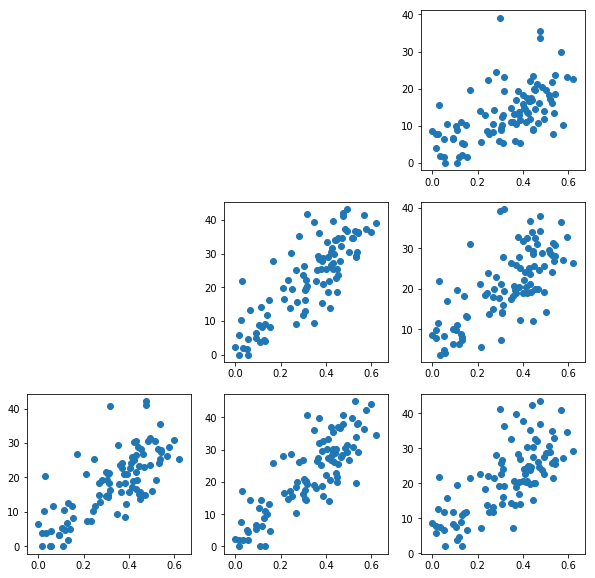

In [218]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
model2plt = {
    2: 7,
    3: 9,
    6: 8,
    4: 6,
    7: 5,
    5: 3
}

m = np.zeros(9)
x = np.zeros(9)
plt.figure(figsize=(10,10))
ouraccs = {}
for model in range(2,8):
    data = []
    wang_accs = []
    our_accs = []
    length = 0
    for i in range(len(all99)):
        r = all99.iloc[i]
        try:
            length += df.loc[(r[4],model),'length'].iloc[0]
            our_accs.append(df.loc[(r[4],model),'accuracy'].iloc[0])
            data.append(r[4])
            if r[4] == 'A3IA77UHAVA83X':
                print(len(our_accs))
                print(data[-1])
                print(our_accs[-1])
            wang_accs.append(r[3])
        except:
            print("missing: {}".format(r[4]))
    print(model, np.mean(our_accs))
    plt.subplot(330+model2plt[model])
    x[model2plt[model]-1] = scipy.stats.pearsonr(our_accs, wang_accs)[0]
    ouraccs[model] = our_accs
    m[model2plt[model]-1] = np.mean(our_accs)
    plt.scatter(wang_accs, our_accs)
print(x.reshape(3,3).round(2))
print(m.reshape(3,3).round(1))

In [156]:
import scipy.stats
scipy.stats.pearsonr(m,x)

(0.9907263900696605, 2.506027342983855e-07)

In [219]:
length

6182.0

In [204]:
list(sorted(zip(data, ouraccs[7], np.array(ouraccs[7]) - np.mean(ouraccs[7]), [(w - np.mean(wang_accs)) * (o - np.mean(ouraccs[7])) for w,o in zip(wang_accs, ouraccs[7])]), key=lambda k:k[3]))

[('A1VLZL3CA1WMPT', 13.7931034483, -9.243191954633337, -0.8336197029099719),
 ('A27890V91M6OO9', 27.8350515464, 4.798756143466662, -0.7653954689230493),
 ('A3SHP9IPZ2FLOX', 30.1587301587, 7.122434755766662, -0.5779690417334373),
 ('A19V9DLZS91SDL', 35.0877192982, 12.051423895266662, -0.575130348512502),
 ('A1TH0PTGDSBWMO', 18.5714285714, -4.464866831533339, -0.5310675409970528),
 ('A9HQ3E0F2AGVO', 15.2542372881, -7.782058114833337, -0.41423397716324384),
 ('A3LZCR1FDVSVQ8', 18.5185185185, -4.517776884433339, -0.357160263499104),
 ('AU5UJIZ3TLI5M', 9.5238095238, -13.512485879133337, -0.27164240284934005),
 ('A3ON3137RY8LPM', 41.7582417582, 18.721946355266663, -0.22341922161141198),
 ('A3UV55HC87DO9C', 25.0, 1.9637045970666627, -0.1219421681460852),
 ('A1M682B2WUSYJP', 21.0526315789, -1.9836638240333357, -0.11968769152745506),
 ('A1XDMS0KFSF5JW', 21.875, -1.1612954029333373, -0.10052485846444026),
 ('A3VRDQJNM1IC0E', 26.3157894737, 3.2794940707666633, -0.08571193491130592),
 ('A610SH5RY1